# Notebook for preparing and saving CIFAR graphs

In [1]:
import numpy as np
import torch
import pickle
import time
import os
%matplotlib inline
import matplotlib.pyplot as plt


# Download CIFAR dataset

In [2]:
if not os.path.isfile('superpixels.zip'):
    print('downloading..')
    !curl https://www.dropbox.com/s/y2qwa77a0fxem47/superpixels.zip?dl=1 -o superpixels.zip -J -L -k
    !unzip superpixels.zip -d ../
    # !tar -xvf superpixels.zip -C ../
else:
    print('File already downloaded')
    

File already downloaded


# Convert to DGL format and save with pickle

In [3]:
import os
os.chdir('../../') # go to root folder of the project
print(os.getcwd())


/Users/xbresson/Documents/Dropbox/06_NTU_2017_now/03_my_codes/34_benchmark20/GITHUB_benchmark_project/benchmarking-gnn


In [4]:
import pickle

%load_ext autoreload
%autoreload 2

from data.superpixels import SuperPixDatasetDGL 

from data.data import LoadData
from torch.utils.data import DataLoader
from data.superpixels import SuperPixDataset


In [5]:
start = time.time()

DATASET_NAME = 'CIFAR10'
dataset = SuperPixDatasetDGL(DATASET_NAME) 

print('Time (sec):',time.time() - start) # 636s=10min


Adj matrix defined from super-pixel locations (only)
preparing 10000 graphs for the TEST set...
preparing 50000 graphs for the TRAIN set...
[I] Data load time: 639.9484s
Time (sec): 639.9550220966339


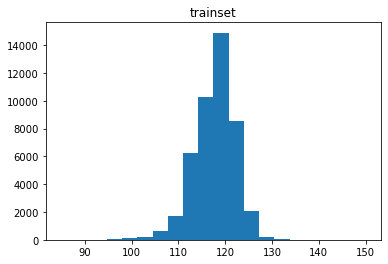

nb/min/max : 45000 85 150


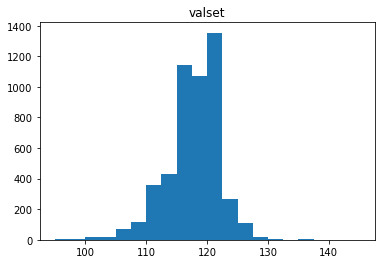

nb/min/max : 5000 95 145


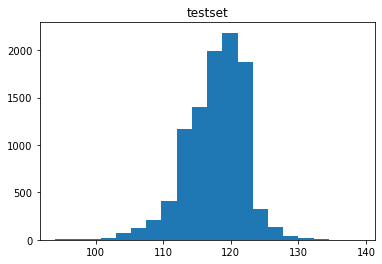

nb/min/max : 10000 94 139


In [6]:
def plot_histo_graphs(dataset, title):
    # histogram of graph sizes
    graph_sizes = []
    for graph in dataset:
        graph_sizes.append(graph[0].number_of_nodes())
        #graph_sizes.append(graph[0].number_of_edges())
    plt.figure(1)
    plt.hist(graph_sizes, bins=20)
    plt.title(title)
    plt.show()
    graph_sizes = torch.Tensor(graph_sizes)
    print('nb/min/max :',len(graph_sizes),graph_sizes.min().long().item(),graph_sizes.max().long().item())
    
plot_histo_graphs(dataset.train,'trainset')
plot_histo_graphs(dataset.val,'valset')
plot_histo_graphs(dataset.test,'testset')


In [7]:
print(len(dataset.train))
print(len(dataset.val))
print(len(dataset.test))

print(dataset.train[0])
print(dataset.val[0])
print(dataset.test[0])


45000
5000
10000
(DGLGraph(num_nodes=110, num_edges=880,
         ndata_schemes={'feat': Scheme(shape=(5,), dtype=torch.float16)}
         edata_schemes={'feat': Scheme(shape=(1,), dtype=torch.float16)}), tensor(6))
(DGLGraph(num_nodes=123, num_edges=984,
         ndata_schemes={'feat': Scheme(shape=(5,), dtype=torch.float16)}
         edata_schemes={'feat': Scheme(shape=(1,), dtype=torch.float16)}), tensor(6))
(DGLGraph(num_nodes=118, num_edges=944,
         ndata_schemes={'feat': Scheme(shape=(5,), dtype=torch.float16)}
         edata_schemes={'feat': Scheme(shape=(1,), dtype=torch.float16)}), tensor(3))


In [8]:
start = time.time()

with open('data/superpixels/CIFAR10.pkl','wb') as f:
        pickle.dump([dataset.train,dataset.val,dataset.test],f)
        
print('Time (sec):',time.time() - start) # 58s


Time (sec): 56.585689067840576


# Test load function

In [9]:
DATASET_NAME = 'CIFAR10'
dataset = LoadData(DATASET_NAME) # 54s
trainset, valset, testset = dataset.train, dataset.val, dataset.test


[I] Loading dataset CIFAR10...
train, test, val sizes : 45000 5000 10000
[I] Finished loading.
[I] Data load time: 76.3279s


In [10]:
start = time.time()

batch_size = 10
collate = SuperPixDataset.collate
train_loader = DataLoader(trainset, batch_size=batch_size, shuffle=True, collate_fn=collate)

print('Time (sec):',time.time() - start) # 0.0001s


Time (sec): 0.002046823501586914
